In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [18]:
b = pd.read_csv('basket_details.csv')
c = pd.read_csv('customer_details.csv')

df = pd.merge(
    left = b,
    right = c,
    on = 'customer_id',
    how = 'inner')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   customer_id   72 non-null     int64  
 1   product_id    72 non-null     int64  
 2   basket_date   72 non-null     object 
 3   basket_count  72 non-null     int64  
 4   sex           72 non-null     object 
 5   customer_age  72 non-null     float64
 6   tenure        72 non-null     int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 4.1+ KB


In [20]:
df['basket_date'] = pd.to_datetime(df['basket_date'])
df2 = df.set_index('basket_date')
gunluk = df2['basket_count'].resample('D').sum()

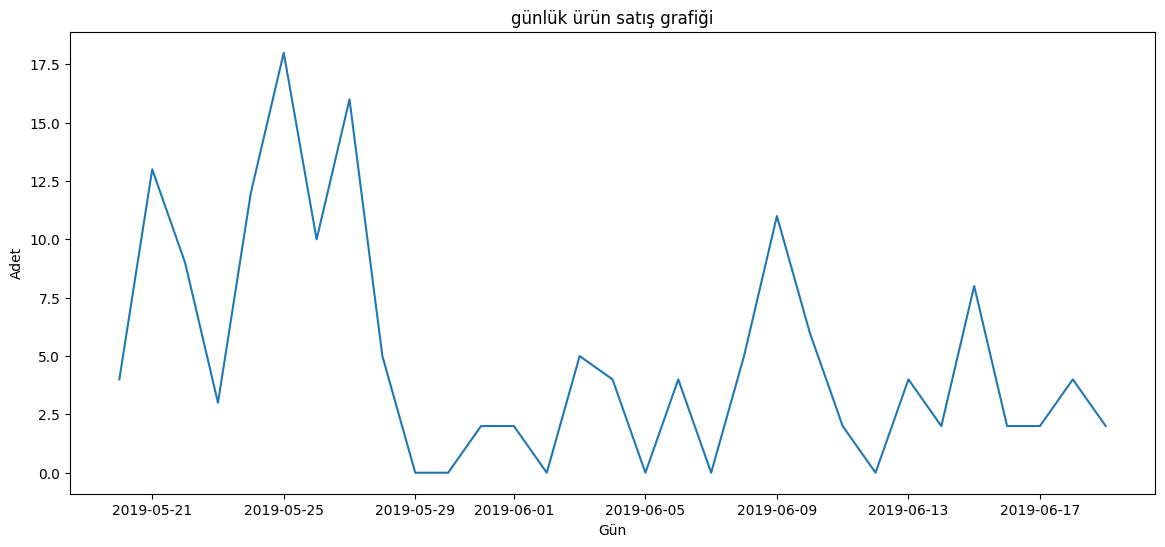

In [23]:
plt.figure(figsize=(14,6))
plt.plot(gunluk.index,gunluk.values)
plt.title('günlük ürün satış grafiği')
plt.xlabel('Gün')
plt.ylabel('Adet')
plt.show()

In [35]:
satislar = df.groupby('product_id')['basket_count'].sum()
urun = satislar.index.astype(str)
satis_sayisi = satislar.values

Text(0.5, 1.0, 'tüm ürünlerin satış miktarı')

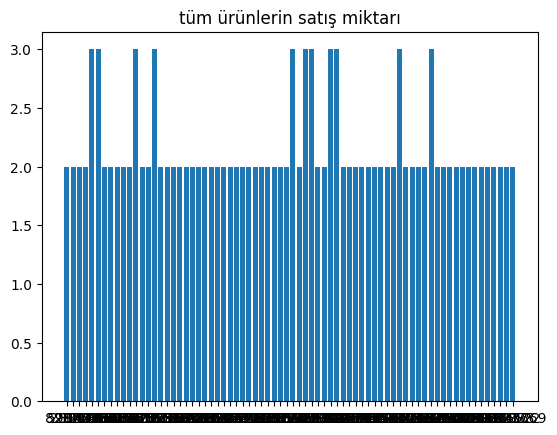

In [36]:
bar = plt.bar(urun,satis_sayisi)
plt.title('tüm ürünlerin satış miktarı')

Text(0.5, 1.0, 'top 10 ürün')

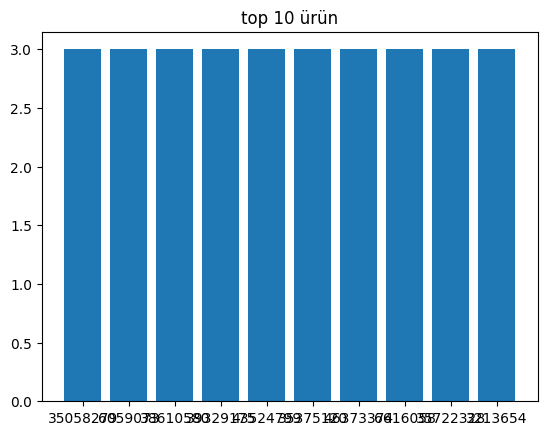

In [32]:
satis10 = satislar.sort_values(ascending=False).head(10)
urun10 = satis10.index.astype(str)
satis_sayisi10 = satis10.values
bar2 = plt.bar(urun10,satis_sayisi10)
plt.title('top 10 ürün')